# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installation

In [ ]:
!pip install --pre deepchem
!pip install rdkit-pypi
from rdkit import rdBase
from rdkit import RDConfig
# !pip install mordred
import deepchem as dc
dc.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.3/792.3 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 20.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 55.8 MB/s eta 0:00:00


'2.7.2.dev'

## Import Modules

In [ ]:
#chemical

from rdkit import Chem
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from rdkit.Chem import Descriptors, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import SelectKBest, f_regression
import cv2
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
import tensorflow as tf
from skimage.feature import hog
# the basics

import pandas as pd, numpy as np
import math, json, gc, random, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# feature scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# feature selection

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# sklearn models 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#DNN model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Concatenate, Flatten
import tensorflow_probability as tfp

#for model evaluation

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

<ipython-input-4-a6bcfca90bf0>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#DNN with PCA

Get the data

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/bittersweetdata/bitter-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/bittersweetdata/bitter-test.csv')

In [ ]:
train_data['mol'] = train_data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 
PandasTools.AddMoleculeColumnToFrame(train_data,'SMILES','Molecule')
PandasTools.ChangeMoleculeRendering(train_data,renderer='image')

test_data['mol'] = test_data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
PandasTools.AddMoleculeColumnToFrame(test_data,'SMILES','Molecule')
PandasTools.ChangeMoleculeRendering(test_data,renderer='image')

[13:43:55] Explicit valence for atom # 2 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 2 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 5 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 6 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 9 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 11 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 3 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 2 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 4 N, 4, is greater than permitted
[13:43:55] Explicit valence for atom # 8 N, 4, is 

Adding Features

RDKit Molecule Descriptor (208 Numeric Descriptor)






In [ ]:
train_data.dropna(inplace=True)
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
df=[np.array(calc.CalcDescriptors(i)) for i in train_data['Molecule']]
df=pd.DataFrame(df,columns=[x[0] for x in Descriptors._descList])
df=df.select_dtypes([np.number])

[13:44:41] WARNING: not removing hydrogen atom without neighbors
[13:44:41] WARNING: not removing hydrogen atom without neighbors
[13:44:41] WARNING: not removing hydrogen atom without neighbors
[13:44:41] WARNING: not removing hydrogen atom without neighbors
[13:44:41] WARNING: not removing hydrogen atom without neighbors
[13:44:41] WARNING: not removing hydrogen atom without neighbors
[13:44:57] WARNING: not removing hydrogen atom without neighbors
[13:44:57] WARNING: not removing hydrogen atom without neighbors


In [ ]:
test_data.dropna(inplace=True)
test_df=[np.array(calc.CalcDescriptors(i)) for i in test_data['Molecule']]
test_df=pd.DataFrame(test_df,columns=[x[0] for x in Descriptors._descList])
test_df=test_df.select_dtypes([np.number])

In [ ]:
df['True']=train_data['Bitter'].astype(int)
test_df['True']=test_data['Bitter'].astype(int)

Cleaning NAN values

In [ ]:
df.dropna(axis = 0,inplace = True)
df.dropna(axis = 1,inplace = True)
df.drop(['Ipc'],axis = 1, inplace = True)
x_train = df.drop(['True'],axis =1)
y_train = df['True']
y_train=y_train.values.ravel()

test_df.dropna(axis = 0, inplace = True)
test_df.dropna(axis = 1, inplace = True)
test_df.drop(['Ipc'],axis = 1, inplace = True)
x_test = test_df.drop(['True'],axis = 1)
y_test = test_df['True']
y_test=y_test.values.ravel()


Feature Scaling

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#                                              **** finding which column was generating NAN values after scaling ****

# df2=pd.DataFrame(data = x_train, columns=[x[0] for x in Descriptors._descList])
# nan_cols = [i for i in df2.columns if df2[i].isnull().any()]
# print(nan_cols)

Features Selection using PCA



In [ ]:
pca=PCA(n_components=0.9)
pca.fit(x_train,y_train)
x_train=pca.transform(x_train)
x_test=pca.transform(x_test)
pca.n_components_

54

DNN Model Train

In [ ]:
# early stopping to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.003,
    restore_best_weights=True,
)

In [ ]:
# DNN MODEL
model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train,y_train, 
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/100
13/13 [==============================] - 5s 27ms/step - loss: 0.6185 - accuracy: 0.6843 - val_loss: 0.8985 - val_accuracy: 0.5191
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.5879 - accuracy: 0.7161 - val_loss: 0.8204 - val_accuracy: 0.5191
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.5556 - accuracy: 0.7187 - val_loss: 0.6432 - val_accuracy: 0.6997
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.5116 - accuracy: 0.7441 - val_loss: 0.6377 - val_accuracy: 0.7532
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4729 - accuracy: 0.7887 - val_loss: 0.6149 - val_accuracy: 0.7430
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4397 - accuracy: 0.8116 - val_loss: 0.6840 - val_accuracy: 0.7430
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4260 - accuracy: 0.8269 - val_loss: 0.6627 - val_accuracy: 0.7557
Epoch 8/10

In [ ]:
# testing
_, accuracy = model.evaluate(x_test,y_test)
print("Test accuracy: %.2f"% (accuracy*100))

4/4 [==============================] - 0s 5ms/step - loss: 0.5850 - accuracy: 0.7565
Model accuracy: 75.65


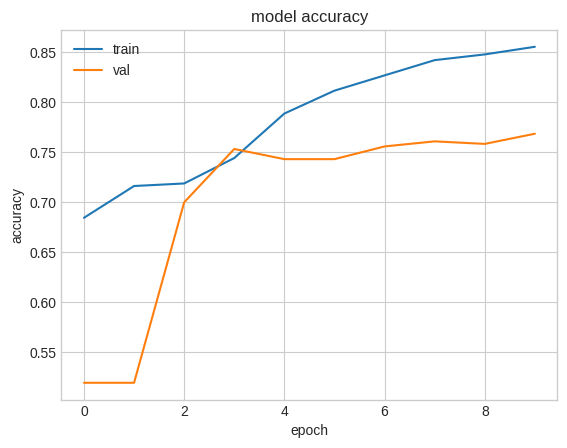

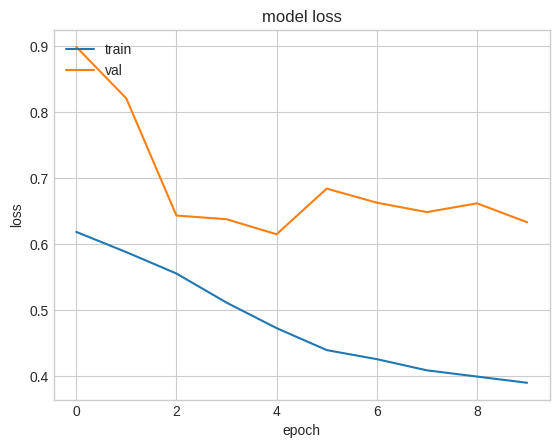

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluation

In [ ]:
predictions = np.array(model.predict(x_test))
actual = np.array(y_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
for i in range(115):
  if predictions[i]<0.5:
    predictions[i]=0
  else:
    predictions[i]=1

In [ ]:
confusion_metrics = metrics.confusion_matrix(actual, predictions)

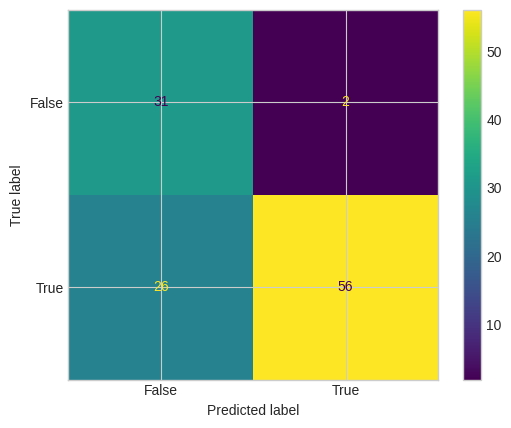

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_metrics, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
TP = confusion_metrics[1,1] # true positive 
TN = confusion_metrics[0,0] # true negatives
FP = confusion_metrics[0,1] # false positives
FN = confusion_metrics[1,0] # false negatives

In [ ]:
acc = (TP + TN)/(TP + FP + FN + TN)
sn = TP/(TP+FN)
precision = TP/(TP+FP)
sp = TN/(TN+FP)
F1 = 2*precision*sn/(precision+sn)
auc_score = roc_auc_score(actual, predictions)
print(f"Precision : {precision:3.2f}\nSensitivity : {sn:3.2f}\nSpecificity : {sp:3.2f}\nF1 : {F1:3.2f}\nAUC : {auc_score:3.2f}")

Precision : 0.97
Sensitivity : 0.68
Specificity : 0.94
F1 : 0.80
AUC : 0.81


In [ ]:
model.save("dnn.hdf5")

# Feature Vector + CNN

In [ ]:
# get the data
train_data=pd.read_csv('/content/drive/MyDrive/bittersweetdata/bitter-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/bittersweetdata/bitter-test.csv')
df_train=train_data
df_test=test_data

In [ ]:
def get_features(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)  # create a molecule object from SMILES
        fp1 = AllChem.GetHashedMorganFingerprint(mol, 2)  # generate Morgan fingerprint
        fp2 = rdMolDescriptors.GetMACCSKeysFingerprint(mol)  # generate MACCS keys
        substruct = Chem.MolFromSmarts('[*]')  # define a generic SMARTS pattern
        matches = mol.GetSubstructMatches(substruct)  # find all matches to the pattern
        n_atoms = mol.GetNumAtoms()  # get the number of atoms in the molecule
        features = [n_atoms]  # start with the number of atoms as a feature
        features += list(fp1)  # add the Morgan fingerprint as features
        features += list(fp2)  # add the MACCS keys as features
        features.append(len(matches))  # add the number of matches to the SMARTS pattern as a feature
    except:
        features = [None] * 166  # return a list of 166 None values for invalid compounds
    return features

# generate feature vectors for all SMILES strings in the dataframe
features = df_train['SMILES'].apply(get_features).tolist()
test_features = df_test['SMILES'].apply(get_features).tolist()

# convert the features to a dataframe and save to a new csv file
df_features = pd.DataFrame(features)
test_df_features = pd.DataFrame(test_features)
# df_features.to_csv('bitter_sweet_features.csv', index=False)

[14:14:48] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 5 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 6 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 11 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 4 N, 4, is greater than permitted
[14:14:48] Explicit valence for atom # 8 N, 4, is 

In [ ]:
df_features['bitter']=df_train['Bitter'].astype(int)
test_df_features['bitter']=df_test['Bitter'].astype(int)

In [ ]:
df_features.dropna(inplace=True)
test_df_features.dropna(inplace=True)

In [ ]:
print(f"Number of features : {len(df_features)}")

Number of features : 2232


In [ ]:
X_train = df_features
y_train = df_features['bitter']
X_test = test_df_features
y_test = df_test['Bitter'].astype(int)

In [ ]:
input_shape = (df_features.shape[1], 1)

# Define the CNN model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split = 0.2)

Epoch 1/40
56/56 [==============================] - 4s 13ms/step - loss: 0.4758 - accuracy: 0.7843 - val_loss: 0.5840 - val_accuracy: 0.7204
Epoch 2/40
56/56 [==============================] - 0s 8ms/step - loss: 0.3178 - accuracy: 0.8762 - val_loss: 0.5508 - val_accuracy: 0.7539
Epoch 3/40
56/56 [==============================] - 0s 8ms/step - loss: 0.2398 - accuracy: 0.9070 - val_loss: 0.5792 - val_accuracy: 0.7360
Epoch 4/40
56/56 [==============================] - 0s 8ms/step - loss: 0.1912 - accuracy: 0.9244 - val_loss: 0.5690 - val_accuracy: 0.7584
Epoch 5/40
56/56 [==============================] - 0s 8ms/step - loss: 0.1487 - accuracy: 0.9445 - val_loss: 0.5328 - val_accuracy: 0.7964
Epoch 6/40
56/56 [==============================] - 0s 8ms/step - loss: 0.1023 - accuracy: 0.9636 - val_loss: 0.4769 - val_accuracy: 0.8412
Epoch 7/40
56/56 [==============================] - 1s 9ms/step - loss: 0.0717 - accuracy: 0.9787 - val_loss: 0.3323 - val_accuracy: 0.8658
Epoch 8/40
56/56 [=

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("Test accuracy: %.2f"% (test_acc*100))
print('Test loss:', test_loss)

6/6 - 0s - loss: 0.0469 - accuracy: 0.9942 - 233ms/epoch - 39ms/step
Model accuracy: 99.42
Test loss: 0.04685069993138313


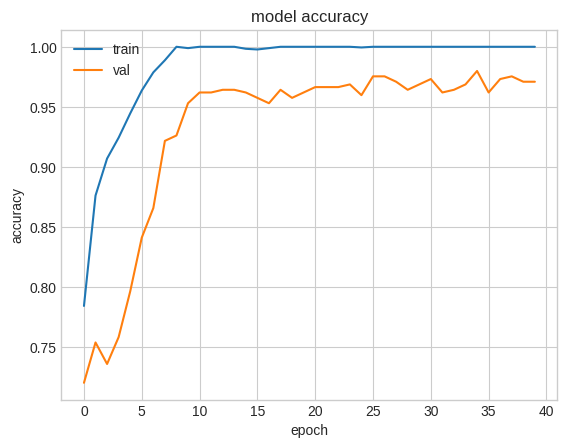

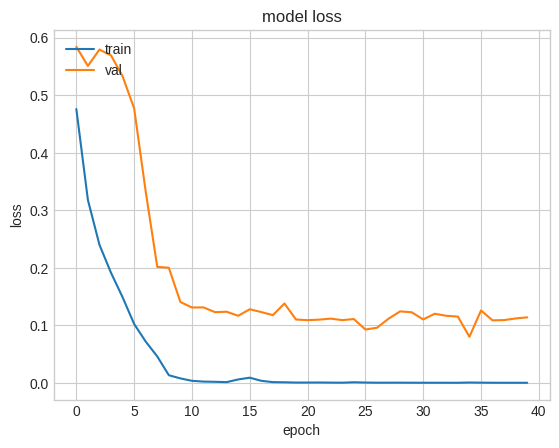

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("feature_vector_model.hdf5")

In [ ]:
predictions = np.array(model.predict(X_test))
actual = np.array(y_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
for i in range(171):
  if predictions[i]<0.5:
    predictions[i]=0
  else:
    predictions[i]=1
confusion_metrics = metrics.confusion_matrix(actual, predictions)

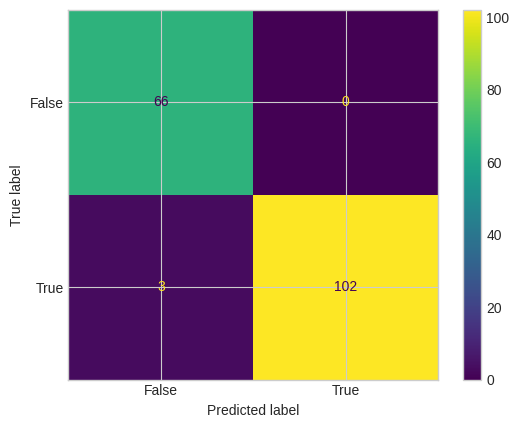

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_metrics, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
TP = confusion_metrics[1,1] # true positive 
TN = confusion_metrics[0,0] # true negatives
FP = confusion_metrics[0,1] # false positives
FN = confusion_metrics[1,0] # false negatives
acc = (TP + TN)/(TP + FP + FN + TN)
sn = TP/(TP+FN)
precision = TP/(TP+FP)
sp = TN/(TN+FP)
F1 = 2*precision*sn/(precision+sn)
auc_score = roc_auc_score(actual, predictions)
print(f"Precision : {precision:3.2f}\nSensitivity : {sn:3.2f}\nSpecificity : {sp:3.2f}\nF1 : {F1:3.2f}\nAUC : {auc_score:3.2f}")

Precision : 1.00
Sensitivity : 0.97
Specificity : 1.00
F1 : 0.99
AUC : 0.99


# Structural Images

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/bittersweetdata/bitter-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/bittersweetdata/bitter-test.csv')

In [ ]:
train_data['mol'] = train_data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 
test_data['mol'] = test_data['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

[14:34:07] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 5 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 6 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 11 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 3 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 2 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 4 N, 4, is greater than permitted
[14:34:07] Explicit valence for atom # 8 N, 4, is 

In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol

def smiles_to_image(smiles):
    # Convert SMILES to RDKit molecule object
    mol = smiles_to_mol(smiles)
    if mol==None:
      return
    # Generate 2D image of molecule using RDKit
    img = Chem.Draw.MolToImage(mol)
    return img

def mol_to_image(mol):
  return Chem.Draw.MolToImage(mol)

def preprocess_image(img, size):
    # Resize image to fixed size
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, (size, size))

    # Convert image to grayscale and normalize pixel values
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    img = tf.keras.applications.vgg16.preprocess_input(img)
    img = img/255.0
    return img

def extract_features(img):
    # Extract HOG features from image
    features = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
    return features

# Example usage
mol_list = train_data['mol']
test_mol_list = test_data['mol']
image_size = 128

# Convert SMILES strings to images
image_list = [mol_to_image(mol) for mol in mol_list]
test_image_list = [mol_to_image(mol) for mol in test_mol_list]
# Preprocess images
preprocessed_image_list = [preprocess_image(img, image_size) for img in image_list]
test_preprocessed_image_list = [preprocess_image(img, image_size) for img in test_image_list]
# Extract features from preprocessed images
# feature_matrix = np.array([extract_features(img) for img in preprocessed_image_list])

In [ ]:
x_train = np.asarray(preprocessed_image_list).astype(np.float32)
x_test = np.asarray(test_preprocessed_image_list).astype(np.float32)

In [ ]:
y_train = train_data['Bitter'].astype(int)
y_test = test_data['Bitter'].astype(int)
print(len(y_train))

2152


Importing pre-trained models

In [ ]:
input_shape = preprocessed_image_list[1].shape

In [ ]:
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape,classes = 2)

In [ ]:
NUM_CLASSES = 1
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

x = base_model.output
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a categorical cross-entropy loss function and an Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.003,
    restore_best_weights=True,
)

history = model.fit(
    x_train,
    y_train,
    steps_per_epoch=len(preprocessed_image_list) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_split = 0.2,
    callbacks = [early_stopping]
)

Epoch 1/50
67/67 [==============================] - 6s 65ms/step - loss: 0.5953 - accuracy: 0.6874 - val_loss: 0.5886 - val_accuracy: 0.6868
Epoch 2/50
67/67 [==============================] - 3s 49ms/step - loss: 0.5295 - accuracy: 0.7408 - val_loss: 0.5935 - val_accuracy: 0.6845
Epoch 3/50
67/67 [==============================] - 3s 52ms/step - loss: 0.5112 - accuracy: 0.7571 - val_loss: 0.6215 - val_accuracy: 0.6752
Epoch 4/50
67/67 [==============================] - 3s 51ms/step - loss: 0.4926 - accuracy: 0.7653 - val_loss: 0.6624 - val_accuracy: 0.6589
Epoch 5/50
67/67 [==============================] - 3s 50ms/step - loss: 0.4809 - accuracy: 0.7740 - val_loss: 0.8530 - val_accuracy: 0.6148
Epoch 6/50
67/67 [==============================] - 3s 51ms/step - loss: 0.4579 - accuracy: 0.7943 - val_loss: 0.7182 - val_accuracy: 0.6404


In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("Model accuracy on test data: %.2f"% (acc*100))
print('Test loss:', loss)

4/4 [==============================] - 0s 56ms/step - loss: 0.5520 - accuracy: 0.7652
Model accuracy on test data: 76.52
Test loss: 0.551956832408905


4/4 [==============================] - 0s 57ms/step


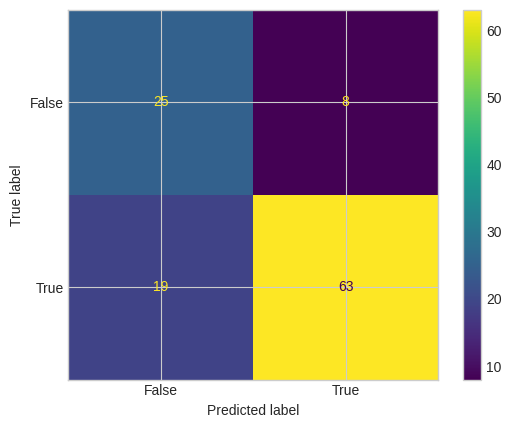

In [ ]:
predictions = np.array(model.predict(x_test))
actual = np.array(y_test)
for i in range(115):
  if predictions[i]<0.5:
    predictions[i]=0
  else:
    predictions[i]=1

confusion_metrics = metrics.confusion_matrix(actual, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_metrics, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
TP = confusion_metrics[1,1] # true positive 
TN = confusion_metrics[0,0] # true negatives
FP = confusion_metrics[0,1] # false positives
FN = confusion_metrics[1,0] # false negatives
acc = (TP + TN)/(TP + FP + FN + TN)
sn = TP/(TP+FN)
precision = TP/(TP+FP)
sp = TN/(TN+FP)
F1 = 2*precision*sn/(precision+sn)
auc_score = roc_auc_score(actual, predictions)
print(f"Precision : {precision:3.2f}\nSensitivity : {sn:3.2f}\nSpecificity : {sp:3.2f}\nF1 : {F1:3.2f}\nAUC : {auc_score:3.2f}")

Precision : 0.93
Sensitivity : 0.77
Specificity : 0.85
F1 : 0.84
AUC : 0.81


In [ ]:
model.save("vgg16.hdf5")

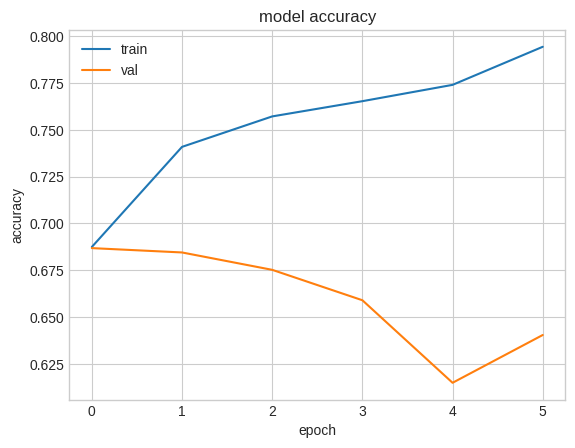

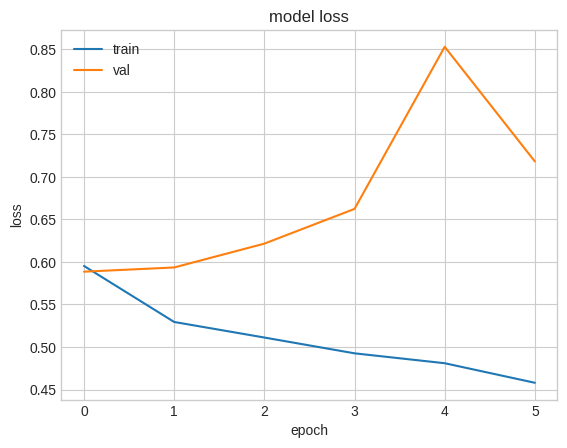

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()